# Table of Contents
- [ GroupBy and Aggregate ](#_groupby and aggregate ) 
- [  Adding a 'weekday' column to our dataframe](#_ adding a 'weekday' column to our dataframe) 
- [ Adding up the cyclists by weekday](#_adding up the cyclists by weekday) 
- [ More GroupBy Magic](#_more groupby magic) 


# GroupBy and Aggregate <a name="_groupby and aggregate "></a>

This notebook is based in it's first part on notebook 4 from the Pandas Cookbook: https://github.com/jvns/pandas-cookbook

And the documentation here on Split-Apply-Combine: http://pandas.pydata.org/pandas-docs/stable/groupby.html

In [140]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#  Adding a 'weekday' column to our dataframe<a name="_ adding a 'weekday' column to our dataframe"></a>

First, we need to load up the data. We've done this before.

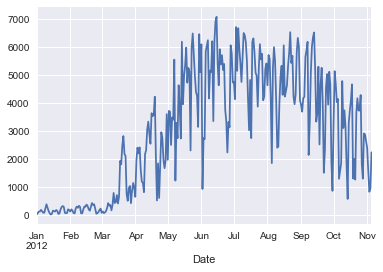

In [141]:
bikes = pd.read_csv('data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
#parse_dates['Date'] -> Read the column Date as dates 
#dayfirst = True -> European format for dates

bikes['Berri 1'].plot()

Next up, we're just going to look at the Berri bike path.

In [142]:
berri_bikes = bikes[['Berri 1']].copy()

In [143]:
berri_bikes[:5]

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


Next, we need to add a 'weekday' column. Firstly, we can get the weekday from the index. We haven't talked about indexes yet, but the index is what's on the left on the above dataframe, under 'Date'. It's basically all the days of the year.  It's how we refer to rows in the dataframe, and how we make plots simpler (the index is automagically the X axis).

In [144]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name='Date', length=310, freq=None)

You can see that actually some of the days are missing -- only 310 days of the year are actually there. Who knows why.

Pandas has a bunch of really great time series functionality, so if we wanted to get the day of the month for each row, we could do it like this:

In [149]:
berri_bikes.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=310)

In [146]:
berri_bikes.head()

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


We actually want the weekday, though:

In [150]:
berri_bikes.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=310)

In [ ]:
#berri_bikes.index.day
#berri_bikes.index.date

These are the days of the week, where 0 is Monday. I found out that 0 was Monday by checking on a calendar.

Now that we know how to *get* the weekday, we can add it as a column in our dataframe like this:

In [151]:
berri_bikes['weekday'] = berri_bikes.index.weekday
berri_bikes[:5]

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


## Adding up the cyclists by weekday<a name="_adding up the cyclists by weekday"></a>


Dataframes have a `.groupby()` method that is similar to SQL groupby or Excel pivots, if you're familiar with them. I'm not going to explain more about it right now -- if you want to to know more, [the documentation](http://pandas.pydata.org/pandas-docs/stable/groupby.html) is really good.

Basically, when we "group by" we combine things that have the same value for a field -- in this case, weekday numbers.

An "groupby" object needs a function after it to be useful.

In this case, `berri_bikes.groupby('weekday').aggregate(sum)` means "Group the rows by weekday and then add up all the values with the same weekday".

In [152]:
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


In [154]:
berri_bikes.groupby('weekday').count()

,Berri 1
weekday,
0,45
1,44
2,44
3,44
4,44
5,44
6,45


In [153]:
berri_bikes.groupby('weekday')

In [155]:
weekday_means = weekday_counts/berri_bikes.groupby('weekday').count()
weekday_means

,Berri 1
weekday,
0,2984.400000
1,3075.113636
2,3476.636364
3,3639.340909
4,3222.068182
5,2308.590909
6,2206.888889


It's hard to remember what 0, 1, 2, 3, 4, 5, 6 mean, so we can fix it up by just setting what the index values should be by hand:

In [156]:
weekday_means.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_means

,Berri 1
Monday,2984.400000
Tuesday,3075.113636
Wednesday,3476.636364
Thursday,3639.340909
Friday,3222.068182
Saturday,2308.590909
Sunday,2206.888889


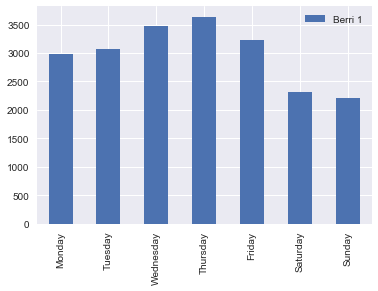

In [157]:
weekday_means.plot(kind='bar')

So it looks like Montrealers are commuter cyclists -- they bike much more during the week. Neat!

** You can also get the day with max mean (or min) ** 

In [158]:
weekday_means['Berri 1'].idxmax()

'Thursday'

** groupby() is also a function for the whole DataFrame**

In [159]:
bikes['weekday'] = bikes.index.weekday

bikes_weekday = bikes.groupby('weekday')

bikes_weekday.aggregate(sum)

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
weekday,,,,,,,,,
0,134298,NaN,60329,90051,163767,90184,46204,130130,NaN
1,135305,NaN,58708,92035,165880,91399,35167,120088,NaN
2,152972,NaN,67344,104891,186061,102103,43263,133088,NaN
3,160131,NaN,69028,111895,196715,105674,45385,140241,NaN
4,141771,NaN,56446,98568,172390,89872,42470,137255,NaN
5,101578,NaN,34018,62067,105060,48289,52861,112828,NaN
6,99310,NaN,36466,55324,98308,50004,61485,117150,NaN


## More GroupBy Magic<a name="_more groupby magic"></a>

In [160]:
# notice I didn't make the year the index this time...
rain = pd.read_csv('data/Paris_Rainfall_Unpivoted.csv')

In [161]:
rain.head(10)

,Year,Month,Value
0,1688,Jan,NaN
1,1688,Feb,NaN
2,1688,Mar,NaN
3,1688,Apr,NaN
4,1688,May,NaN
5,1688,Jun,75.0
6,1688,Jul,47.0
7,1688,Aug,9.0
8,1688,Sep,43.0
9,1688,Oct,46.0


In [162]:
# Doing something to it, like describe, makes it something visible:
rain.groupby('Year').describe().head(20)

Value                                                       
     count       mean        std   min    25%   50%    75%    max
Year                                                             
1688   7.0  44.714286  19.241572   9.0  43.50  46.0  48.00   75.0
1689  12.0  40.916667  27.975503  18.0  21.50  36.5  46.25  116.0
1690  12.0  47.416667  24.640906   9.0  23.75  53.0  68.50   79.0
1691   0.0        NaN        NaN   NaN    NaN   NaN    NaN    NaN
1692   0.0        NaN        NaN   NaN    NaN   NaN    NaN    NaN
1693  12.0  51.166667  21.590542  20.0  36.25  53.0  65.00   86.0
1694  12.0  26.833333  24.180508   5.0  10.75  19.0  34.50   90.0
1695  12.0  44.333333  25.021203  12.0  27.50  46.0  57.25   88.0
1696  12.0  43.916667  32.517012  10.0  18.00  34.5  58.00  113.0
1697   0.0        NaN        NaN   NaN    NaN   NaN    NaN    NaN
1698   0.0        NaN        NaN   NaN    NaN   NaN    NaN    NaN
1699  12.0  42.166667  22.172191  22.0  25.75  31.0  54.25   82.0
1700  12.0  45.250000  27.206700   3.0  29.25  38.5  59.25  100.0
1701  12.0  48.166667  27.152208   2.0  35.25  45.5  57.25  102.0
1702  12.0  36.833333  17.366809  13.0  24.00  40.0  41.25   81.0
1703  12.0  39.000000  20.941477   8.0  27.00  37.5  52.25   77.0
1704  12.0  44.916667  17.170050  19.0  34.75  44.0  56.50   77.0
1705  12.0  31.333333  19.089899   6.0  15.00  32.5  45.50   63.0
1706  12.0  31.250000  20.538766   0.0  15.75  32.5  44.50   68.0
1707  12.0  40.500000  30.663867   9.0  19.25  25.5  66.75   92.0

Now we use an "aggregate" function on the group and tell it to use the function sum():

In [164]:
rain.groupby('Year').aggregate(sum).head()

,Value
Year,
1688,313.0
1689,491.0
1690,569.0
1691,NaN
1692,NaN


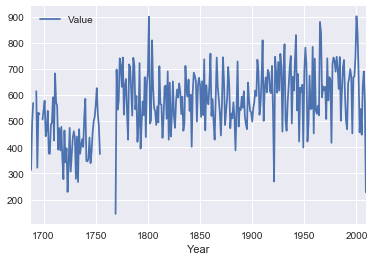

In [165]:
rain.groupby('Year').aggregate(sum).plot()

In [166]:
# here we use a numpy function, np.mean() -- notice you don't write the () when you use these as arguments!
rain.groupby(["Month"]).aggregate(np.mean)

,Year,Value
Month,,
Apr,1848.5,43.758278
Aug,1848.5,50.973597
Dec,1848.5,46.993399
Feb,1848.5,36.440397
Jan,1848.5,43.052980
Jul,1848.5,55.920530
Jun,1848.5,52.834437
Mar,1848.5,38.354305
May,1848.5,53.817881


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B8091FDCF8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001B80AD69CF8>]], dtype=object)

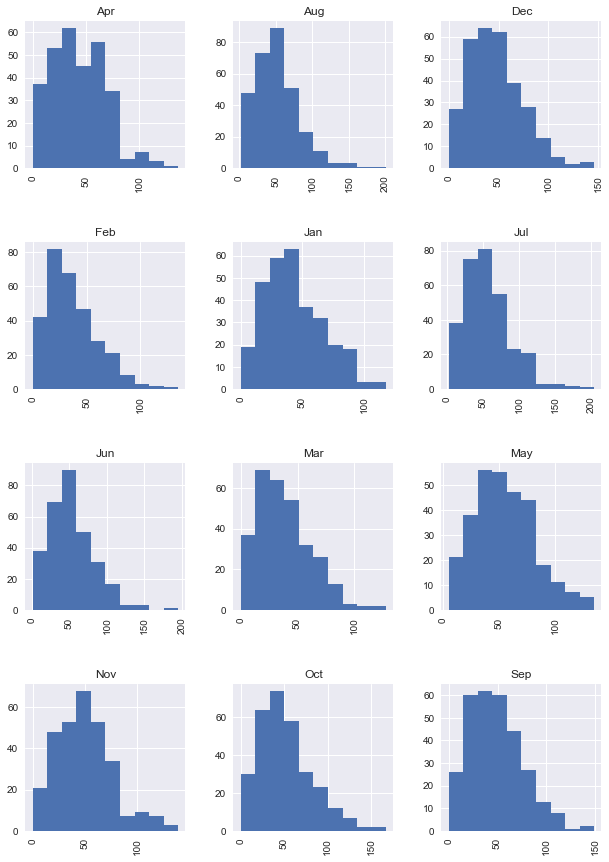

In [167]:
# some plot types will do groups for you, like this one; just say what you want to group "by"
rain.hist("Value", by="Month", figsize=(10,15))

In [168]:
# get the sum by year and sort descending, take top 10:
rain.groupby("Year").aggregate(sum).sort_values(by="Value",ascending=False)[0:10]

,Value
Year,
2000,901.0
1801,899.0
1965,879.0
2001,838.0
1966,836.0
1942,829.0
1910,809.0
1804,809.0
1931,794.0


In [169]:
#  Aggregate(sum) and .sum()  do the same thing.
# get the sum by year and sort descending, take top 10:
rain.groupby("Year").sum().head() #.sort_values(by="Value",ascending=False)[0:10]

,Value
Year,
1688,313.0
1689,491.0
1690,569.0
1691,NaN
1692,NaN


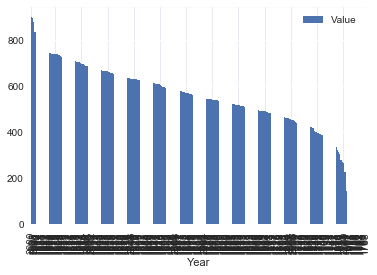

In [170]:
# get the sum by year and sort descending, then plot them all as bars!
rain.groupby("Year").sum().sort_values(by="Value",ascending=False).plot(kind="bar")

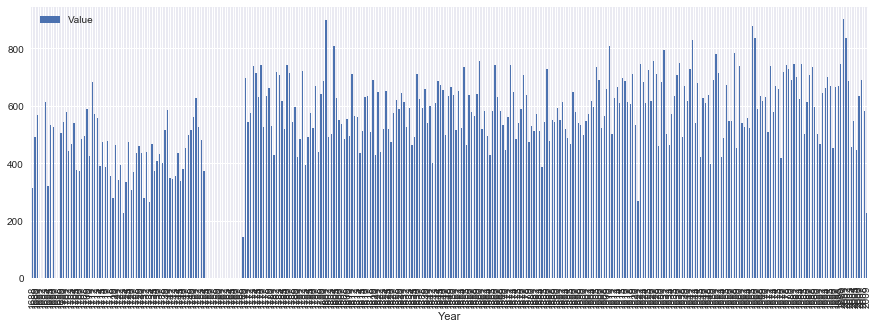

In [106]:
# get the sum by year and plot, not sorted.  The years should be increasing on the X axis.
rain.groupby("Year").sum().plot(kind="bar", figsize=(15, 5))

GroupBy Objects are dicts, with keys being how they are grouped.

In [108]:
rain.groupby("Month").groups

{'Apr': Int64Index([   3,   15,   27,   39,   51,   63,   75,   87,   99,  111,
             ...
             3747, 3759, 3771, 3783, 3795, 3807, 3819, 3831, 3843, 3855],
            dtype='int64', length=322),
 'Aug': Int64Index([   7,   19,   31,   43,   55,   67,   79,   91,  103,  115,
             ...
             3751, 3763, 3775, 3787, 3799, 3811, 3823, 3835, 3847, 3859],
            dtype='int64', length=322),
 'Dec': Int64Index([  11,   23,   35,   47,   59,   71,   83,   95,  107,  119,
             ...
             3755, 3767, 3779, 3791, 3803, 3815, 3827, 3839, 3851, 3863],
            dtype='int64', length=322),
 'Feb': Int64Index([   1,   13,   25,   37,   49,   61,   73,   85,   97,  109,
             ...
             3745, 3757, 3769, 3781, 3793, 3805, 3817, 3829, 3841, 3853],
            dtype='int64', length=322),
 'Jan': Int64Index([   0,   12,   24,   36,   48,   60,   72,   84,   96,  108,
             ...
             3744, 3756, 3768, 3780, 3792, 3804, 3816, 3828

This means simple dict operations work on them --


In [171]:
rain.groupby("Month").groups['Oct']

Int64Index([   9,   21,   33,   45,   57,   69,   81,   93,  105,  117,
            ...
            3753, 3765, 3777, 3789, 3801, 3813, 3825, 3837, 3849, 3861],
           dtype='int64', length=322)

In [172]:
# and you can iterate over them:
years = rain.groupby("Year")
# special kind of dict that doesn't allow items() -- but works same way:
for name, group in years:
    print("In group ",name)
    print(group)

In group  1688
    Year Month  Value
0   1688   Jan    NaN
1   1688   Feb    NaN
2   1688   Mar    NaN
3   1688   Apr    NaN
4   1688   May    NaN
5   1688   Jun   75.0
6   1688   Jul   47.0
7   1688   Aug    9.0
8   1688   Sep   43.0
9   1688   Oct   46.0
10  1688   Nov   44.0
11  1688   Dec   49.0
In group  1689
    Year Month  Value
12  1689   Jan   36.0
13  1689   Feb   22.0
14  1689   Mar   22.0
15  1689   Apr   37.0
16  1689   May   18.0
17  1689   Jun   20.0
18  1689   Jul  116.0
19  1689   Aug   41.0
20  1689   Sep   45.0
21  1689   Oct   50.0
22  1689   Nov   66.0
23  1689   Dec   18.0
In group  1690
    Year Month  Value
24  1690   Jan   70.0
25  1690   Feb   32.0
26  1690   Mar   43.0
27  1690   Apr   24.0
28  1690   May   68.0
29  1690   Jun   63.0
30  1690   Jul   73.0
31  1690   Aug   79.0
32  1690   Sep   21.0
33  1690   Oct   64.0
34  1690   Nov   23.0
35  1690   Dec    9.0
In group  1691
    Year Month  Value
36  1691   Jan    NaN
37  1691   Feb    NaN
38  1691   Mar  

In [53]:
# you can use the groupby object to them aggregate, of course. This results in a data frame, not a groupby object
years.aggregate(np.median).head()

,Value
Year,
1688,46.0
1689,36.5
1690,53.0
1691,NaN
1692,NaN


In [54]:
# size of each group (it's months, so 12, right?)
years.size().head()

Year
1688    12
1689    12
1690    12
1691    12
1692    12
dtype: int64

We can do multiple aggregate functions at once, if we put them in a dictionary with names for the columns.  This is a good way to get descriptive stats you can use later.

In [112]:
yearstats = years["Value"].agg({"mean": np.mean, "median": np.median, "min": min, "max": max})
yearstats.head()

C:\Users\Hugo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,mean,median,min,max
Year,,,,
1688,44.714286,46.0,9.0,75.0
1689,40.916667,36.5,18.0,116.0
1690,47.416667,53.0,9.0,79.0
1691,NaN,NaN,NaN,NaN
1692,NaN,NaN,NaN,NaN


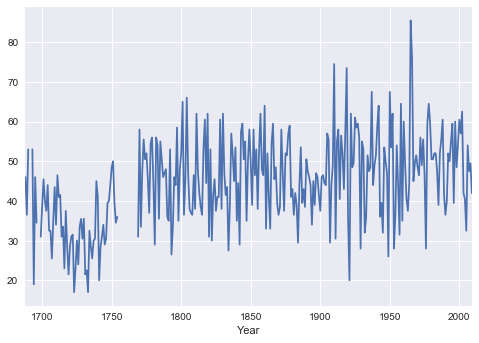

In [113]:
yearstats['median'].plot()

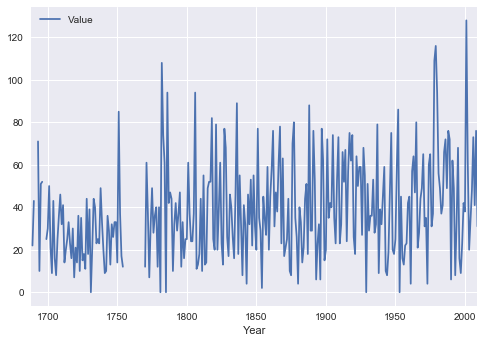

In [114]:
# if you are working with a group object, there is also this convenience method get_group - which does the same as above:
rain.groupby("Month").get_group("Mar").plot("Year", "Value")